In [1]:
import corner
import matplotlib.pyplot as plt
import numpy as np

import lmfit

In [53]:
lmfit.Parameters

lmfit.parameter.Parameters

In [2]:
def double_exp(x, a1, t1, a2, t2):
    return a1*np.exp(-x/t1) + a2*np.exp(-(x-0.1) / t2)


model = lmfit.Model(double_exp)

In [3]:
truths = (3.0, 2.0, -5.0, 10.0)
x = np.linspace(1, 10, 250)
np.random.seed(0)
y = double_exp(x, *truths)+0.1*np.random.randn(x.size)

In [4]:
p = model.make_params(a1=4, t1=3, a2=4, t2=3)

<ipython-input-2-03f9a1f35203>:2: RuntimeWarning: overflow encountered in exp
  return a1*np.exp(-x/t1) + a2*np.exp(-(x-0.1) / t2)
<ipython-input-2-03f9a1f35203>:2: RuntimeWarning: overflow encountered in multiply
  return a1*np.exp(-x/t1) + a2*np.exp(-(x-0.1) / t2)


[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 609
    # data points      = 250
    # variables        = 4
    chi-square         = 2.33333982
    reduced chi-square = 0.00948512
    Akaike info crit   = -1160.54007
    Bayesian info crit = -1146.45423
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    a1:  2.98623689 (init = 4)
    t1:  1.30993186 (init = 3)
    a2: -4.33525597 (init = 4)
    t2:  11.8240752 (init = 3)


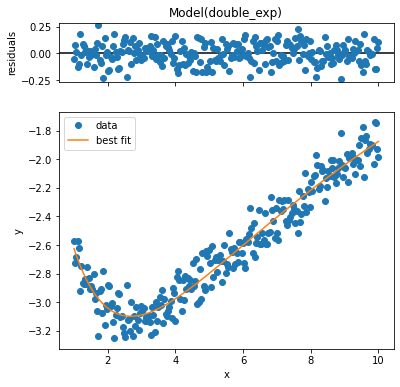

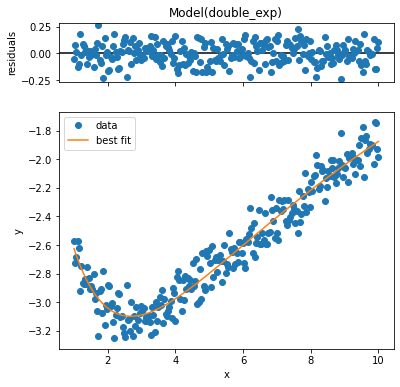

In [10]:
result = model.fit(data=y, params=p, x=x, method='Nelder', nan_policy='omit')

lmfit.report_fit(result)
result.plot()

In [51]:
result.chisqr

2.3333398189956296

In [50]:
result

In [46]:
result

In [38]:
print(result.params['a1'].value)

2.986236886110775


In [6]:
emcee_kws = dict(steps=5000, burn=500, thin=20, is_weighted=False,
                 progress=False)
emcee_params = result.params.copy()
emcee_params.add('__lnsigma', value=np.log(0.1), min=np.log(0.001), max=np.log(2.0))

In [7]:
result_emcee = model.fit(data=y, x=x, params=emcee_params, method='emcee',
                         nan_policy='omit', fit_kws=emcee_kws)

In [8]:
lmfit.report_fit(result_emcee)

[[Fit Statistics]]
    # fitting method   = emcee
    # function evals   = 500000
    # data points      = 250
    # variables        = 5
    chi-square         = 245.221790
    reduced chi-square = 1.00090526
    Akaike info crit   = 5.17553688
    Bayesian info crit = 22.7828415
[[Variables]]
    a1:         2.99546858 +/- 0.14834594 (4.95%) (init = 2.986237)
    t1:         1.32127391 +/- 0.14079400 (10.66%) (init = 1.309932)
    a2:        -4.34376940 +/- 0.12389335 (2.85%) (init = -4.335256)
    t2:         11.7937607 +/- 0.48879633 (4.14%) (init = 11.82408)
    __lnsigma: -2.32712371 +/- 0.04514314 (1.94%) (init = -2.302585)
[[Correlations]] (unreported correlations are < 0.100)
    C(a2, t2) = 0.981
    C(t1, a2) = -0.937
    C(t1, t2) = -0.895
    C(a1, t1) = -0.515
    C(a1, a2) = 0.220
    C(a1, t2) = 0.187


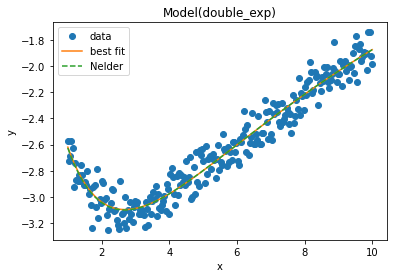

In [9]:
result_emcee.plot_fit()
plt.plot(x, model.eval(params=result.params, x=x), '--', label='Nelder')
plt.legend()